In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dementia_dataset1 (7).csv to dementia_dataset1 (7) (1).csv


In [ ]:
import pandas as pd

# Assuming you uploaded a CSV file named 'your_data.csv'
df = pd.read_csv('dementia_dataset1 (7).csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Filter rows where age is 60 or greater
df_filtered = df[df['Age'] >= 60].copy()

# Drop columns 'Delay' and 'Hand' if they exist
columns_to_drop = ['Delay', 'Hand','ASF']
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

# Add 'Dementia_Status' column based on 'CDR'
df_filtered['Dementia_Status'] = df_filtered['CDR'].apply(lambda x: 'Non-demented' if x == 0 else 'Demented')

# --- New modification for 'Educ' ---
# Filter rows where Educ > 5
educ_filter = df_filtered['Educ'] > 5
df_to_normalize = df_filtered[educ_filter].copy()

# Check if the DataFrame to normalize is not empty
if not df_to_normalize.empty:
    # Apply Min-Max Normalization
    scaler = MinMaxScaler()
    # Reshape the data for the scaler (it expects a 2D array)
    df_to_normalize['Educ'] = scaler.fit_transform(df_to_normalize[['Educ']])

    # Convert to integer values
    df_to_normalize['Educ'] = df_to_normalize['Educ'].round().astype(int)

    # Update the original df_filtered DataFrame with the normalized and integer values
    df_filtered.loc[educ_filter, 'Educ'] = df_to_normalize['Educ']
else:
    print("No rows found with 'Educ' > 5 to normalize.")
# --- End of new modification ---


# Display the resulting DataFrame
display(df_filtered)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,Dementia_Status
0,OAS1_0001_MR1,F,74.0,2.0,3.0,29.0,0.0,1344.0,0.743,Non-demented
2,OAS1_0003_MR1,F,73.0,4.0,3.0,27.0,0.5,1454.0,0.708,Demented
8,OAS1_0010_MR1,M,74.0,5.0,2.0,30.0,0.0,1636.0,0.689,Non-demented
11,OAS1_0013_MR1,F,81.0,5.0,2.0,30.0,0.0,1664.0,0.679,Non-demented
13,OAS1_0015_MR1,M,76.0,2.0,NaN,28.0,0.5,1738.0,0.719,Demented
...,...,...,...,...,...,...,...,...,...,...
494,NaN,M,77.0,1.0,3.0,30.0,0.0,1820.0,0.768,Non-demented
495,NaN,M,60.0,0.0,4.0,30.0,0.0,1379.0,0.806,Non-demented
496,NaN,M,62.0,0.0,4.0,30.0,0.0,1378.0,0.795,Non-demented
497,NaN,M,68.0,1.0,3.0,26.0,0.0,1444.0,0.778,Non-demented


In [ ]:
# Split the filtered DataFrame into male and female DataFrames
df_male = df_filtered[df_filtered['M/F'] == 'M'].copy()
df_female = df_filtered[df_filtered['M/F'] == 'F'].copy()

# Display the resulting DataFrames (optional)
# display(df_male)
# display(df_female)

In [ ]:
print("Missing values in df_male:")
print(df_male.isnull().sum())

print("\nMissing values in df_female:")
print(df_female.isnull().sum())

Missing values in df_male:
ID                 63
M/F                 0
Age                 0
Educ                0
SES                 9
MMSE                0
CDR                 0
eTIV                0
nWBV                0
Dementia_Status     0
dtype: int64

Missing values in df_female:
ID                  0
M/F                 0
Age                 0
Educ                0
SES                11
MMSE                0
CDR                 0
eTIV                0
nWBV                0
Dementia_Status     0
dtype: int64


In [ ]:
# Calculate the mode for 'SES' in df_male and fill missing values
mode_ses_male = df_male['SES'].mode()[0]
df_male['SES'].fillna(mode_ses_male, inplace=True)

# Calculate the mode for 'SES' in df_female and fill missing values
mode_ses_female = df_female['SES'].mode()[0]
df_female['SES'].fillna(mode_ses_female, inplace=True)

# Check missing values after imputation
print("Missing values in df_male after imputation:")
print(df_male.isnull().sum())

print("\nMissing values in df_female after imputation:")
print(df_female.isnull().sum())

Missing values in df_male after imputation:
ID                 63
M/F                 0
Age                 0
Educ                0
SES                 0
MMSE                0
CDR                 0
eTIV                0
nWBV                0
Dementia_Status     0
dtype: int64

Missing values in df_female after imputation:
ID                 0
M/F                0
Age                0
Educ               0
SES                0
MMSE               0
CDR                0
eTIV               0
nWBV               0
Dementia_Status    0
dtype: int64


<ipython-input-9-780148097>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_male['SES'].fillna(mode_ses_male, inplace=True)
<ipython-input-9-780148097>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Filters df to include only rows with Age >= 60
df_filtered = df[df['Age'] >= 60].copy()

# 2. Drops 'Delay' and 'Hand' columns if they exist
columns_to_drop = ['Delay', 'Hand']
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns])

# 3. Adds a column Dementia_Status (based on CDR == 0 -> 'Non-demented', else 'Demented')
df_filtered['Dementia_Status'] = df_filtered['CDR'].apply(lambda x: 'Non-demented' if x == 0 else 'Demented')

# 4. Splits into df_male and df_female using 'M/F'
df_male = df_filtered[df_filtered['M/F'] == 'M'].copy()
df_female = df_filtered[df_filtered['M/F'] == 'F'].copy()

# 5. Fills missing 'SES' using the mode
mode_ses_male = df_male['SES'].mode()[0]
df_male['SES'].fillna(mode_ses_male, inplace=True)

mode_ses_female = df_female['SES'].mode()[0]
df_female['SES'].fillna(mode_ses_female, inplace=True)

# 6. Prints missing value counts for both male and female DataFrames
print("Missing values in df_male after imputation:")
print(df_male.isnull().sum())

print("\nMissing values in df_female after imputation:")
print(df_female.isnull().sum())

# 7. Defines feature columns: ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
feature_cols = ['Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV']

# 8. Separates X and y, and performs train_test_split for both male and female groups

# For male data
X_male = df_male[feature_cols]
y_male = df_male['Dementia_Status']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, stratify=y_male, random_state=42)

# For female data
X_female = df_female[feature_cols]
y_female = df_female['Dementia_Status']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, stratify=y_female, random_state=42)

print("\nMale Data Split Shapes:")
print("X_train_male shape:", X_train_male.shape)
print("X_test_male shape:", X_test_male.shape)
print("y_train_male shape:", y_train_male.shape)
print("y_test_male shape:", y_test_male.shape)

print("\nFemale Data Split Shapes:")
print("X_train_female shape:", X_train_female.shape)
print("X_test_female shape:", X_test_female.shape)
print("y_train_female shape:", y_train_female.shape)
print("y_test_female shape:", y_test_female.shape)

Missing values in df_male after imputation:
ID                 63
M/F                 0
Age                 0
Educ                0
SES                 0
MMSE                0
CDR                 0
eTIV                0
nWBV                0
ASF                 0
Dementia_Status     0
dtype: int64

Missing values in df_female after imputation:
ID                 0
M/F                0
Age                0
Educ               0
SES                0
MMSE               0
CDR                0
eTIV               0
nWBV               0
ASF                0
Dementia_Status    0
dtype: int64

Male Data Split Shapes:
X_train_male shape: (104, 6)
X_test_male shape: (26, 6)
y_train_male shape: (104,)
y_test_male shape: (26,)

Female Data Split Shapes:
X_train_female shape: (104, 6)
X_test_female shape: (27, 6)
y_train_female shape: (104,)
y_test_female shape: (27,)


<ipython-input-10-4244445721>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_male['SES'].fillna(mode_ses_male, inplace=True)
<ipython-input-10-4244445721>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Calculate the mode for 'SES' in df_male
male_ses_mode = df_male['SES'].mode()[0]

# Fill missing values in 'SES' using assignment
df_male['SES'] = df_male['SES'].fillna(male_ses_mode)

# Calculate the mode for 'SES' in df_female and fill missing values
mode_ses_female = df_female['SES'].mode()[0]
df_female['SES'].fillna(mode_ses_female, inplace=True)

# Check missing values after imputation
print("Missing values in df_male after imputation:")
print(df_male.isnull().sum())

print("\nMissing values in df_female after imputation:")
print(df_female.isnull().sum())

Missing values in df_male after imputation:
ID                 63
M/F                 0
Age                 0
Educ                0
SES                 0
MMSE                0
CDR                 0
eTIV                0
nWBV                0
ASF                 0
Dementia_Status     0
dtype: int64

Missing values in df_female after imputation:
ID                 0
M/F                0
Age                0
Educ               0
SES                0
MMSE               0
CDR                0
eTIV               0
nWBV               0
ASF                0
Dementia_Status    0
dtype: int64


<ipython-input-11-1444969298>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_female['SES'].fillna(mode_ses_female, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Encode the target variable (Dementia_Status) using LabelEncoder
le = LabelEncoder()
y_train_male_encoded = le.fit_transform(y_train_male)
y_test_male_encoded = le.transform(y_test_male)

# 2. Train an XGBClassifier
xgb_model_male = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_male.fit(X_train_male, y_train_male_encoded)

# 3. Predict on the test set (X_test_male)
y_pred_male = xgb_model_male.predict(X_test_male)

# 4. Calculate and print evaluation metrics

# Convert predictions back to original labels for easier interpretation if needed
y_pred_male_labels = le.inverse_transform(y_pred_male)

accuracy_male = accuracy_score(y_test_male_encoded, y_pred_male)
precision_male = precision_score(y_test_male_encoded, y_pred_male)
recall_male = recall_score(y_test_male_encoded, y_pred_male)
f1_male = f1_score(y_test_male_encoded, y_pred_male)
roc_auc_male = roc_auc_score(y_test_male_encoded, xgb_model_male.predict_proba(X_test_male)[:, 1]) # Use predict_proba for AUC

print("Evaluation Metrics for Male Patients (XGBoost):")
print(f"Accuracy: {accuracy_male:.4f}")
print(f"Precision: {precision_male:.4f}")
print(f"Recall: {recall_male:.4f}")
print(f"F1-score: {f1_male:.4f}")
print(f"ROC AUC: {roc_auc_male:.4f}")

Evaluation Metrics for Male Patients (XGBoost):
Accuracy: 0.6923
Precision: 0.6875
Recall: 0.7857
F1-score: 0.7333
ROC AUC: 0.7976


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 1. Encode the target variable (Dementia_Status) for female data using the same LabelEncoder
# The LabelEncoder 'le' is already fitted on the combined classes from male data,
# so we can directly transform the female target variables.
y_train_female_encoded = le.transform(y_train_female)
y_test_female_encoded = le.transform(y_test_female)

# 2. Train an XGBClassifier for female data
xgb_model_female = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_female.fit(X_train_female, y_train_female_encoded)

# 3. Predict on the test set (X_test_female)
y_pred_female = xgb_model_female.predict(X_test_female)

# 4. Calculate and print evaluation metrics for female patients

# Convert predictions back to original labels if needed (optional)
y_pred_female_labels = le.inverse_transform(y_pred_female)

accuracy_female = accuracy_score(y_test_female_encoded, y_pred_female)
precision_female = precision_score(y_test_female_encoded, y_pred_female)
recall_female = recall_score(y_test_female_encoded, y_pred_female)
f1_female = f1_score(y_test_female_encoded, y_pred_female)
roc_auc_female = roc_auc_score(y_test_female_encoded, xgb_model_female.predict_proba(X_test_female)[:, 1]) # Use predict_proba for AUC

print("\nEvaluation Metrics for Female Patients (XGBoost):")
print(f"Accuracy: {accuracy_female:.4f}")
print(f"Precision: {precision_female:.4f}")
print(f"Recall: {recall_female:.4f}")
print(f"F1-score: {f1_female:.4f}")
print(f"ROC AUC: {roc_auc_female:.4f}")


Evaluation Metrics for Female Patients (XGBoost):
Accuracy: 0.8889
Precision: 0.8333
Recall: 1.0000
F1-score: 0.9091
ROC AUC: 0.9333


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Create a dictionary to store the evaluation metrics for both models
evaluation_summary = {
    'Male Model': {
        'Accuracy': accuracy_male,
        'Precision': precision_male,
        'Recall': recall_male,
        'F1-score': f1_male,
        'ROC AUC': roc_auc_male
    },
    'Female Model': {
        'Accuracy': accuracy_female,
        'Precision': precision_female,
        'Recall': recall_female,
        'F1-score': f1_female,
        'ROC AUC': roc_auc_female
    }
}

# Print the comparison clearly
print("------------------------------------------------")
print("      Model Performance Comparison (XGBoost)    ")
print("------------------------------------------------")

for model_name, metrics in evaluation_summary.items():
    print(f"\n--- {model_name} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

print("------------------------------------------------")

# Optional: Discussion
print("\nInterpretation:")
print("Comparing the metrics for the male and female models can provide insights into how well the model performs on each gender group.")
print("A higher value for a metric generally indicates better performance for that specific aspect.")
print("For example, a higher Accuracy means the model is more often correct in its predictions (both demented and non-demented).")
print("Precision is important when the cost of a false positive is high.")
print("Recall is important when the cost of a false negative is high (missing a demented case).")
print("F1-score is a harmonic mean of Precision and Recall, balancing both.")
print("ROC AUC measures the model's ability to distinguish between the two classes.")

# Example Interpretation (you can customize this based on the actual results)
if accuracy_male > accuracy_female:
    print("\nThe male model has a slightly higher accuracy, suggesting it correctly classifies a larger proportion of male patients.")
elif accuracy_female > accuracy_male:
    print("\nThe female model has a slightly higher accuracy, suggesting it correctly classifies a larger proportion of female patients.")
else:
    print("\nBoth models have similar accuracy.")

if roc_auc_male > roc_auc_female:
     print("The male model also shows a higher ROC AUC, indicating better overall discrimination ability between demented and non-demented male patients.")
elif roc_auc_female > roc_auc_male:
     print("The female model shows a higher ROC AUC, indicating better overall discrimination ability between demented and non-demented female patients.")
else:
    print("Both models have similar ROC AUC scores.")

print("\nDifferences in performance could be due to variations in the distribution of features or the relationship between features and dementia status between genders in this dataset.")

------------------------------------------------
      Model Performance Comparison (XGBoost)    
------------------------------------------------

--- Male Model ---
Accuracy: 0.6923
Precision: 0.6875
Recall: 0.7857
F1-score: 0.7333
ROC AUC: 0.7976

--- Female Model ---
Accuracy: 0.8889
Precision: 0.8333
Recall: 1.0000
F1-score: 0.9091
ROC AUC: 0.9333
------------------------------------------------

Interpretation:
Comparing the metrics for the male and female models can provide insights into how well the model performs on each gender group.
A higher value for a metric generally indicates better performance for that specific aspect.
For example, a higher Accuracy means the model is more often correct in its predictions (both demented and non-demented).
Precision is important when the cost of a false positive is high.
Recall is important when the cost of a false negative is high (missing a demented case).
F1-score is a harmonic mean of Precision and Recall, balancing both.
ROC AUC mea

In [ ]:
# Import SHAP and initialize the explainer
import shap
shap.initjs()

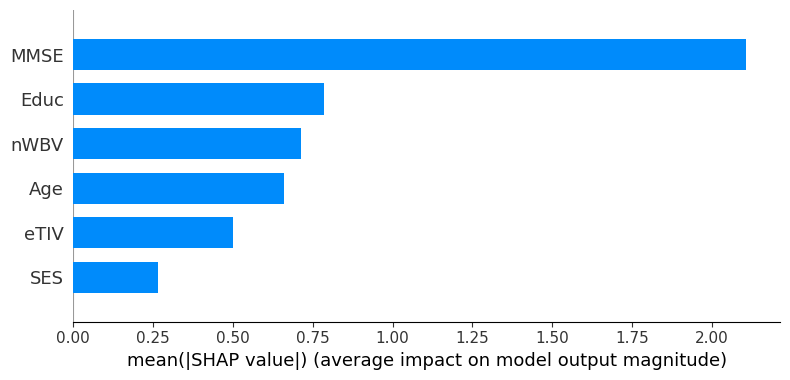

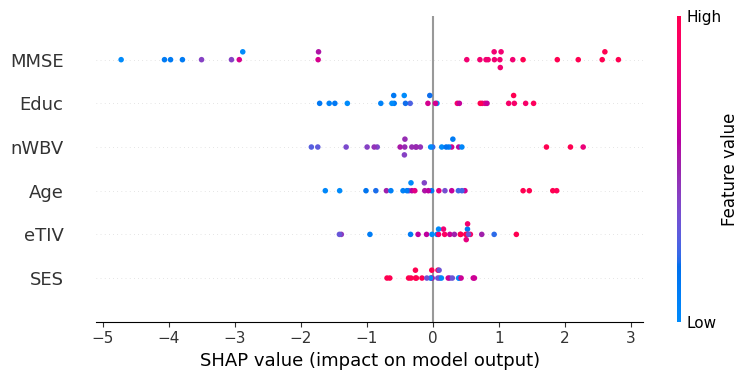

In [ ]:
explainer_male = shap.Explainer(xgb_model_male)
shap_values_male = explainer_male(X_test_male)

# Summary plot
shap.summary_plot(shap_values_male, X_test_male, plot_type='bar')
shap.summary_plot(shap_values_male, X_test_male)


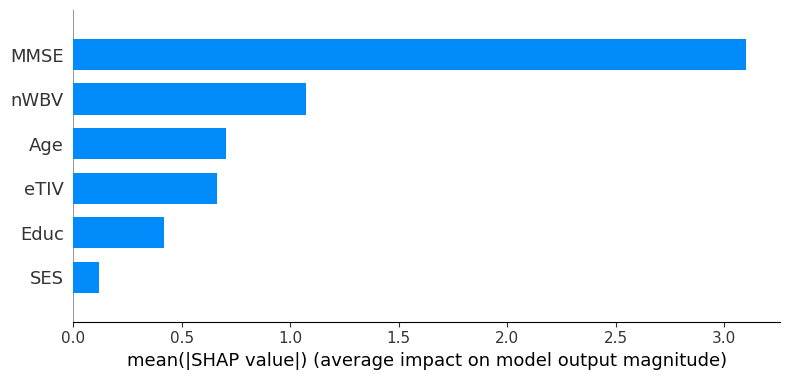

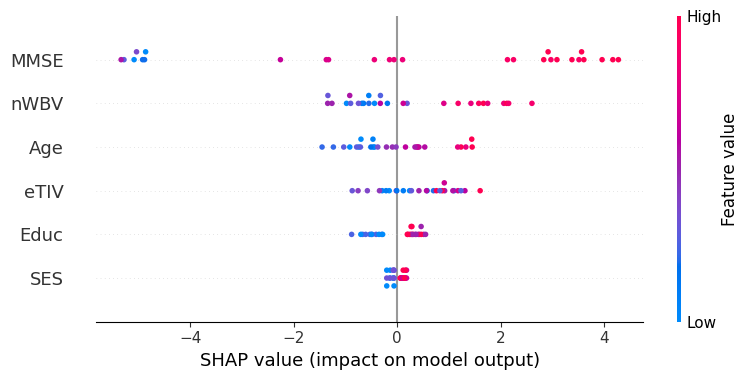

In [ ]:
explainer_female = shap.Explainer(xgb_model_female)
shap_values_female = explainer_female(X_test_female)

# Summary plot
shap.summary_plot(shap_values_female, X_test_female, plot_type='bar')
shap.summary_plot(shap_values_female, X_test_female)


Mean Absolute SHAP values for Male Model:


,0
MMSE,2.107905
Educ,0.786367
nWBV,0.713199
Age,0.658894
eTIV,0.500520
SES,0.264621



Mean Absolute SHAP values for Female Model:


,0
MMSE,3.101403
nWBV,1.071332
Age,0.703600
eTIV,0.662939
Educ,0.419174
SES,0.118264


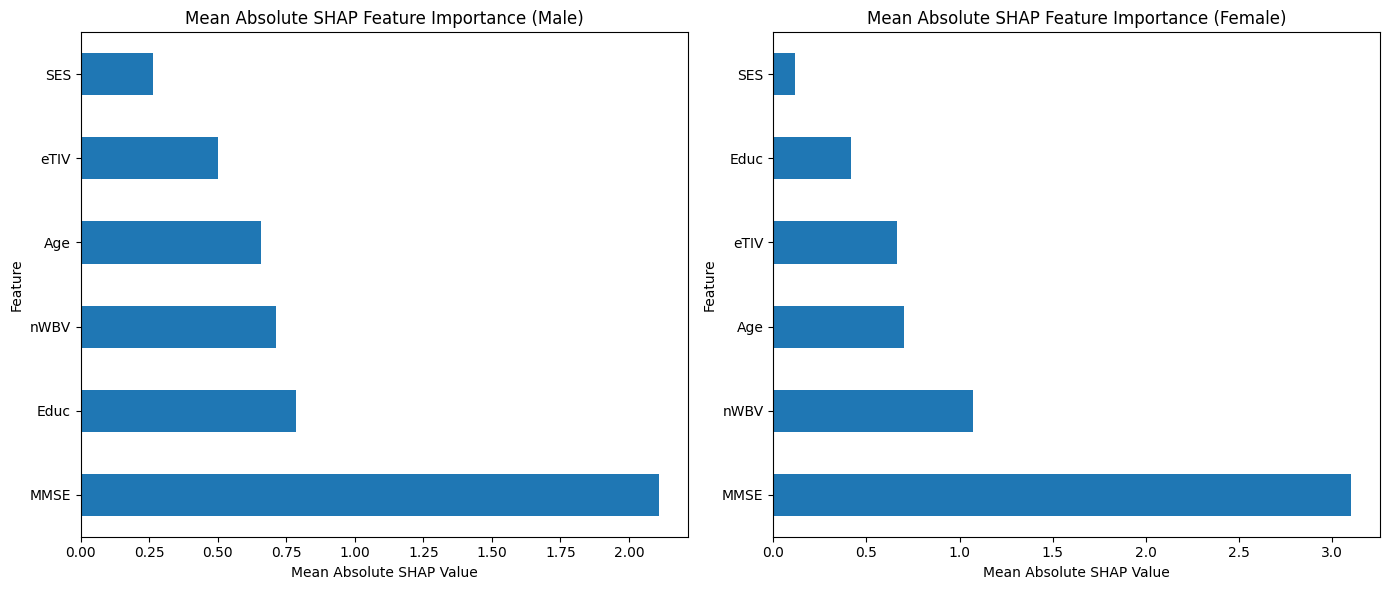

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting
import shap # Ensure shap is imported if not already

# Calculate mean absolute SHAP values for male model
# Access the .values attribute of the Explanation object
male_mean_abs_shap = abs(shap_values_male.values).mean(axis=0)
male_feature_importance = pd.Series(male_mean_abs_shap, index=X_test_male.columns).sort_values(ascending=False)

# Calculate mean absolute SHAP values for female model
# Access the .values attribute of the Explanation object
female_mean_abs_shap = abs(shap_values_female.values).mean(axis=0)
female_feature_importance = pd.Series(female_mean_abs_shap, index=X_test_female.columns).sort_values(ascending=False)

print("Mean Absolute SHAP values for Male Model:")
display(male_feature_importance)

print("\nMean Absolute SHAP values for Female Model:")
display(female_feature_importance)

# Create bar plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Male
male_feature_importance.plot(kind='barh', ax=axes[0])
axes[0].set_title('Mean Absolute SHAP Feature Importance (Male)')
axes[0].set_xlabel('Mean Absolute SHAP Value')
axes[0].set_ylabel('Feature')

# Bar plot for Female
female_feature_importance.plot(kind='barh', ax=axes[1])
axes[1].set_title('Mean Absolute SHAP Feature Importance (Female)')
axes[1].set_xlabel('Mean Absolute SHAP Value')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define a wider range of parameters to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize RandomizedSearchCV for the male model
# We'll use n_iter to control the number of parameter combinations to sample
random_search_male = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=100, # Number of parameter settings that are sampled (adjust as needed)
    scoring='roc_auc', # or another appropriate metric
    cv=5, # number of stratified cross-validation folds
    verbose=1, # display progress
    random_state=42, # for reproducibility
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the male training data
print("Performing Randomized Search for Male Model...")
random_search_male.fit(X_train_male, y_train_male_encoded)

# Print the best parameters and best score for the male model
print("\nBest parameters for Male Model:", random_search_male.best_params_)
print("Best ROC AUC score for Male Model:", random_search_male.best_score_)

# The best estimator is now in random_search_male.best_estimator_
best_xgb_male_tuned = random_search_male.best_estimator_

# You can now evaluate this best_xgb_male_tuned model on the X_test_male data

Performing Randomized Search for Male Model...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters for Male Model: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best ROC AUC score for Male Model: 0.8578451178451179


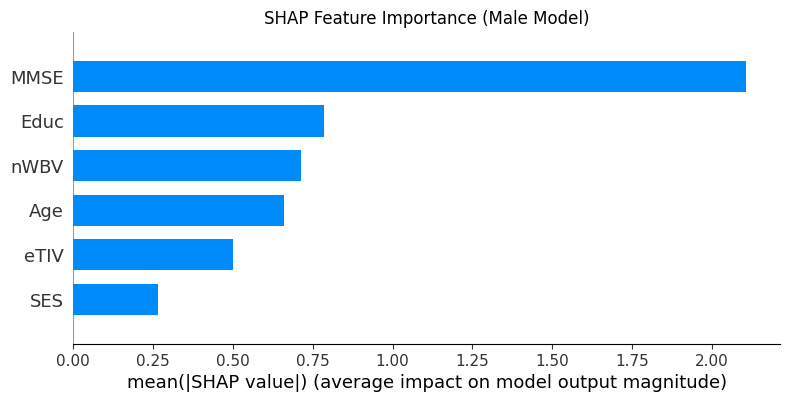

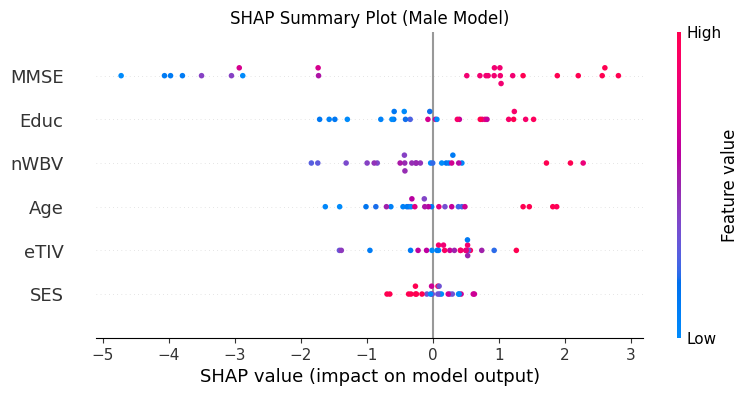

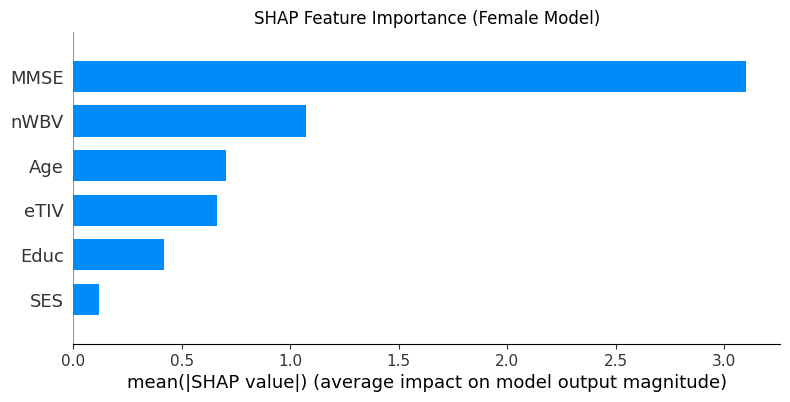

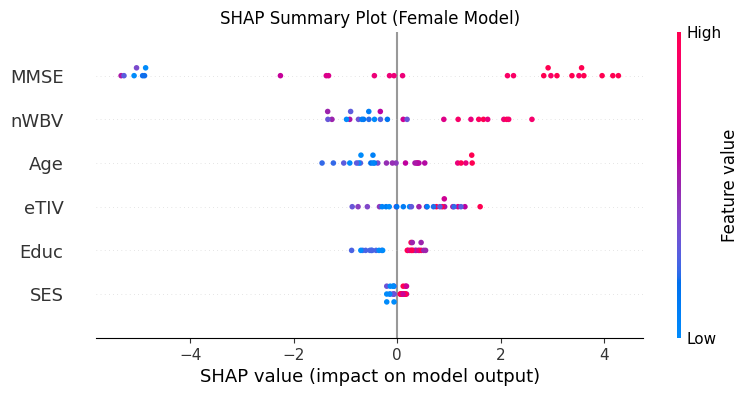

In [ ]:
# This code should already be in your notebook
import shap
shap.initjs()

explainer_male = shap.Explainer(xgb_model_male) # Use the model trained with early stopping
shap_values_male = explainer_male(X_test_male)

# Summary plot (bar plot)
shap.summary_plot(shap_values_male, X_test_male, plot_type='bar', show=False) # show=False to prevent automatic display
import matplotlib.pyplot as plt
plt.title("SHAP Feature Importance (Male Model)")
plt.show()

# Summary plot (dot plot)
shap.summary_plot(shap_values_male, X_test_male, show=False)
plt.title("SHAP Summary Plot (Male Model)")
plt.show()

explainer_female = shap.Explainer(xgb_model_female) # Use the model trained with early stopping
shap_values_female = explainer_female(X_test_female)

# Summary plot (bar plot)
shap.summary_plot(shap_values_female, X_test_female, plot_type='bar', show=False)
plt.title("SHAP Feature Importance (Female Model)")
plt.show()

# Summary plot (dot plot)
shap.summary_plot(shap_values_female, X_test_female, show=False)
plt.title("SHAP Summary Plot (Female Model)")
plt.show()

In [ ]:
# Define the reduced feature set based on SHAP analysis
reduced_feature_cols = ['Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']

# Prepare data for the reduced feature set

# For male data with reduced features
X_male_reduced = df_male[reduced_feature_cols] # <-- This line is where features are selected
y_male = df_male['Dementia_Status']
X_train_male_reduced, X_test_male_reduced, y_train_male, y_test_male = train_test_split(
    X_male_reduced, y_male, test_size=0.2, stratify=y_male, random_state=42
)

# For female data with reduced features
X_female_reduced = df_female[reduced_feature_cols] # <-- This line is where features are selected
y_female = df_female['Dementia_Status']
X_train_female_reduced, X_test_female_reduced, y_train_female, y_test_female = train_test_split(
    X_female_reduced, y_female, test_size=0.2, stratify=y_female, random_state=42
)

In [ ]:
# Retrain XGBoost models with the reduced feature set and early stopping

# For male data
xgb_model_male_reduced = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    early_stopping_rounds=10,  # Stop if no improvement on test set for 10 rounds
    random_state=42
)

print("Training Male Model with Reduced Features (Early Stopping)...")
eval_set_male = [(X_train_male_reduced, y_train_male_encoded), (X_test_male_reduced, y_test_male_encoded)]
xgb_model_male_reduced.fit(
    X_train_male_reduced,
    y_train_male_encoded,
    eval_set=eval_set_male,
    verbose=False # Set to True to see training progress
)
print("Training Complete.")

# For female data
xgb_model_female_reduced = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    early_stopping_rounds=10,  # Stop if no improvement on test set for 10 rounds
    random_state=42
)

print("Training Female Model with Reduced Features (Early Stopping)...")
eval_set_female = [(X_train_female_reduced, y_train_female_encoded), (X_test_female_reduced, y_test_female_encoded)]
xgb_model_female_reduced.fit(
    X_train_female_reduced,
    y_train_female_encoded,
    eval_set=eval_set_female,
    verbose=False # Set to True to see training progress
)
print("Training Complete.")

Training Male Model with Reduced Features (Early Stopping)...
Training Complete.
Training Female Model with Reduced Features (Early Stopping)...
Training Complete.


In [ ]:
# Evaluate the retrained models on the test set

# For male model (reduced features)
y_pred_male_reduced = xgb_model_male_reduced.predict(X_test_male_reduced)

accuracy_male_reduced = accuracy_score(y_test_male_encoded, y_pred_male_reduced)
precision_male_reduced = precision_score(y_test_male_encoded, y_pred_male_reduced)
recall_male_reduced = recall_score(y_test_male_encoded, y_pred_male_reduced)
f1_male_reduced = f1_score(y_test_male_encoded, y_pred_male_reduced)
roc_auc_male_reduced = roc_auc_score(y_test_male_encoded, xgb_model_male_reduced.predict_proba(X_test_male_reduced)[:, 1])

# For female model (reduced features)
y_pred_female_reduced = xgb_model_female_reduced.predict(X_test_female_reduced)

accuracy_female_reduced = accuracy_score(y_test_female_encoded, y_pred_female_reduced)
precision_female_reduced = precision_score(y_test_female_encoded, y_pred_female_reduced)
recall_female_reduced = recall_score(y_test_female_encoded, y_pred_female_reduced)
f1_female_reduced = f1_score(y_test_female_encoded, y_pred_female_reduced)
roc_auc_female_reduced = roc_auc_score(y_test_female_encoded, xgb_model_female_reduced.predict_proba(X_test_female_reduced)[:, 1])

# Compare performance using a summary table

# Create a dictionary to store all evaluation metrics
comparison_summary = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Male Model (Full Features)': [accuracy_male, precision_male, recall_male, f1_male, roc_auc_male],
    'Male Model (Reduced Features)': [accuracy_male_reduced, precision_male_reduced, recall_male_reduced, f1_male_reduced, roc_auc_male_reduced],
    'Female Model (Full Features)': [accuracy_female, precision_female, recall_female, f1_female, roc_auc_female],
    'Female Model (Reduced Features)': [accuracy_female_reduced, precision_female_reduced, recall_female_reduced, f1_female_reduced, roc_auc_female_reduced]
}

# Create a Pandas DataFrame for easy comparison and printing
comparison_df = pd.DataFrame(comparison_summary).set_index('Metric')

# Print the comparison table
print("\n------------------------------------------------------------------------------------")
print("       Performance Comparison: Full vs. Reduced Feature XGBoost Models            ")
print("------------------------------------------------------------------------------------")
print(comparison_df.to_string(formatters={col: '{:.4f}'.format for col in comparison_df.columns}))
print("------------------------------------------------------------------------------------")

# Optional: Add a brief interpretation of the results
print("\nInterpretation Notes:")
print("- Compare the 'Full Features' and 'Reduced Features' columns for each gender.")
print("- Observe if reducing the feature set based on SHAP improved or maintained performance.")
print("- A reduced feature set can sometimes lead to better generalization, faster training,")
print("  and potentially reduced overfitting, depending on the dataset and feature relationships.")
print("- Significant drops in performance might indicate that the removed features were important.")


------------------------------------------------------------------------------------
       Performance Comparison: Full vs. Reduced Feature XGBoost Models            
------------------------------------------------------------------------------------
          Male Model (Full Features) Male Model (Reduced Features) Female Model (Full Features) Female Model (Reduced Features)
Metric                                                                                                                         
Accuracy                      0.6923                        0.7692                       0.8889                          0.8889
Precision                     0.6875                        0.7500                       0.8333                          0.8333
Recall                        0.7857                        0.8571                       1.0000                          1.0000
F1-score                      0.7333                        0.8000                       0.9091           

SHAP Feature Importance (Male Model - Reduced Features):


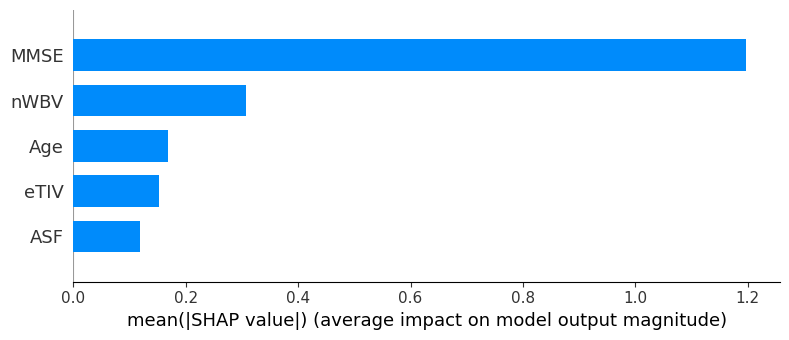

SHAP Summary Plot (Male Model - Reduced Features):


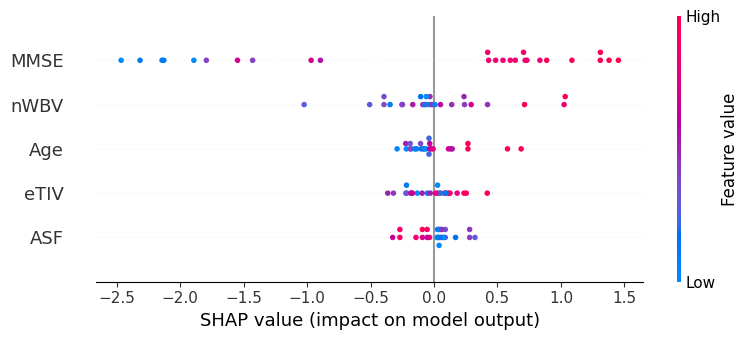

SHAP Feature Importance (Female Model - Reduced Features):


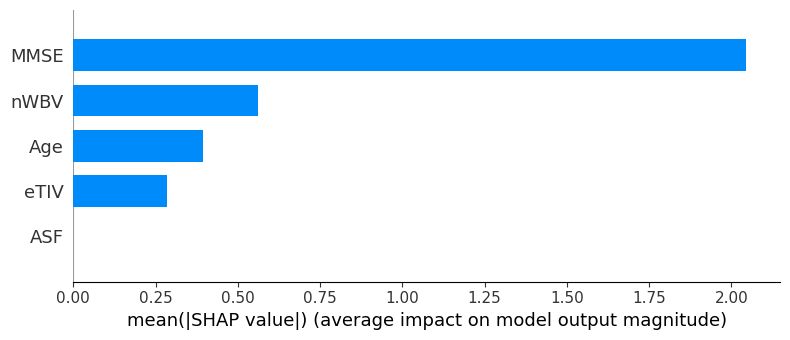

SHAP Summary Plot (Female Model - Reduced Features):


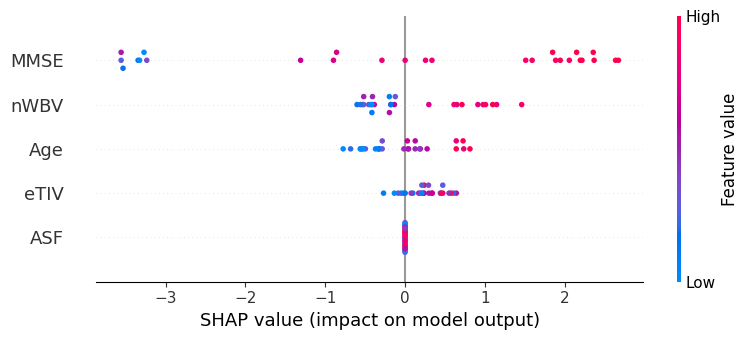

In [ ]:
# Import SHAP and initialize the explainer
import shap
shap.initjs()

# Explain the retrained male model (reduced features)
explainer_male_reduced = shap.Explainer(xgb_model_male_reduced)
shap_values_male_reduced = explainer_male_reduced(X_test_male_reduced)

# Summary plot for the male model with reduced features (bar plot)
print("SHAP Feature Importance (Male Model - Reduced Features):")
shap.summary_plot(shap_values_male_reduced, X_test_male_reduced, plot_type='bar')

# Summary plot for the male model with reduced features (dot plot)
print("SHAP Summary Plot (Male Model - Reduced Features):")
shap.summary_plot(shap_values_male_reduced, X_test_male_reduced)


# Explain the retrained female model (reduced features)
explainer_female_reduced = shap.Explainer(xgb_model_female_reduced)
shap_values_female_reduced = explainer_female_reduced(X_test_female_reduced)

# Summary plot for the female model with reduced features (bar plot)
print("SHAP Feature Importance (Female Model - Reduced Features):")
shap.summary_plot(shap_values_female_reduced, X_test_female_reduced, plot_type='bar')

# Summary plot for the female model with reduced features (dot plot)
print("SHAP Summary Plot (Female Model - Reduced Features):")
shap.summary_plot(shap_values_female_reduced, X_test_female_reduced)

In [ ]:
# Assuming y_pred_male_reduced and y_pred_female_reduced are available from previous steps

# For the Male Model (Reduced Features)
print("Demented/Non-demented Ratio for Male Model (Reduced Features):")
demented_male_count = (y_pred_male_reduced == 1).sum()
non_demented_male_count = (y_pred_male_reduced == 0).sum()

if non_demented_male_count > 0:
    ratio_male = demented_male_count / non_demented_male_count
    print(f"Demented: {demented_male_count}, Non-demented: {non_demented_male_count}, Ratio (Demented/Non-demented): {ratio_male:.4f}")
else:
    print(f"Demented: {demented_male_count}, Non-demented: {non_demented_male_count}, Ratio: Undefined (No non-demented predictions)")

print("-" * 40) # Separator

# For the Female Model (Reduced Features)
print("Demented/Non-demented Ratio for Female Model (Reduced Features):")
demented_female_count = (y_pred_female_reduced == 1).sum()
non_demented_female_count = (y_pred_female_reduced == 0).sum()

if non_demented_female_count > 0:
    ratio_female = demented_female_count / non_demented_female_count
    print(f"Demented: {demented_female_count}, Non-demented: {non_demented_female_count}, Ratio (Demented/Non-demented): {ratio_female:.4f}")
else:
    print(f"Demented: {demented_female_count}, Non-demented: {non_demented_female_count}, Ratio: Undefined (No non-demented predictions)")

print("-" * 40) # Separator

Demented/Non-demented Ratio for Male Model (Reduced Features):
Demented: 16, Non-demented: 10, Ratio (Demented/Non-demented): 1.6000
----------------------------------------
Demented/Non-demented Ratio for Female Model (Reduced Features):
Demented: 18, Non-demented: 9, Ratio (Demented/Non-demented): 2.0000
----------------------------------------
